Error on fit is: 1584.918936839959


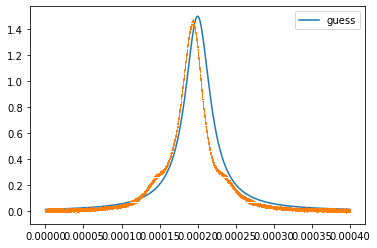


Error on fit is: 1584.918936839959
Error on fit is: 99.79638290921363
Error on fit is: 83.44487317271934
Error on fit is: 83.41545435606989
Error on fit is: 83.40452331592137
Error on fit is: 83.39375969111406
Error on fit is: 83.38300760342312
Error on fit is: 83.37226269635137
Error on fit is: 83.36152466920244
Error on fit is: 83.3507934937863
Best fit parameters are p0= 1.49970971375992 p1= 0.0001923884730818978 p2= 1.6967411973999137e-05


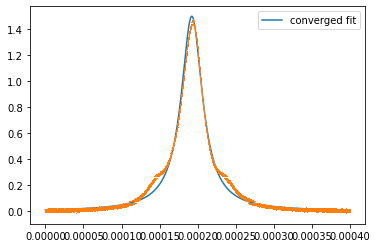

In [105]:
# pset 4
# a)

import numpy as np
import matplotlib.pyplot as plt

data = np.load('sidebands.npz')
t = data['time']
d = data['signal']

# Newton's method
# let's try to fit a Lorentzian # f(t) = p0/(1+(t-p1)**2/p2**2)
def lorentz(p,t):
    f = p[0]/(1+(t-p[1])**2/(p[2]**2))
    # analytic derivative for all parameters
    grad = np.zeros([t.size, p.size])
    grad[:,0]=1/(t+(t-p[1])**2/(p[2]**2))
    grad[:,1]=(2*p[0]*p[2]**2*(t-p[1]))/((t-p[1])**2+p[2]**2)**2
    grad[:,2]=(2*p[0]*p[2]*(t-p[1])**2)/((t-p[1])**2+p[2]**2)**2
    return f, grad

# initial (somewhat good) guess for parameters
p0 = np.array([1.5,0.0002,0.00002])
d0,grad = lorentz(p0,t)
r=d-d0
err=(r**2).sum()
print('Error on fit is:',err)
plt.plot(t,d0,label='guess')
plt.plot(t,d,',')
plt.legend()
plt.show()

p=p0.copy()
print()
for j in range(10):
    pred,grad=lorentz(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
    print ('Error on fit is:',err)
print('Best fit parameters are p0=',p[0],'p1=',p[1],'p2=',p[2])  
plt.plot(t,pred,label='converged fit')
plt.plot(t,d,',')
plt.legend()
plt.show()

We see that Newton's method converged pretty fast, and the error on the fit is about 83. This does not look too good, maybe a single Lorentzian isn't a super good fit.

In [ ]:
# b)
# let's estimate the noise
N = np.mean(d-pred)**2